In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import random 

import numpy as np
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import anndata as ann

sc.settings.set_figure_params(dpi=100)

In [3]:
DATA_DIR = ""
FILE_NAME_NEUT_GENES = ""
FILE_NAME_MRNA_GENES = ""

FILE_NAME_NEUT_SCRNA = ""
FILE_NAME_MRNA_SCRNA = ""

FILE_NAME_PROT = ""

In [4]:
neutrophil_degranulation_genes = pd.read_csv(f"{DATA_DIR}/{FILE_NAME_NEUT_GENES}")["0"].tolist()
mrna_processing_genes = pd.read_csv(f"{DATA_DIR}/{FILE_NAME_MRNA_GENES}")["0"].tolist()

In [ ]:
data_scrna_nd = pd.read_csv(f"{DATA_DIR}/{FILE_NAME_NEUT_SCRNA}", index_col=0)

In [7]:
adata_prot = sc.read(f"{DATA_DIR}/{FILE_NAME_PROT}")

In [8]:
adata_prot_nd = adata_prot[:, neutrophil_degranulation_genes]

In [14]:
adata_prot_nd.obs["region_sample"] = adata_prot_nd.obs["region_sample"].astype('category')

Trying to set attribute `.obs` of view, copying.


In [14]:
adata_prot_nd = adata_prot_nd[adata_prot_nd.obs["region"] == "Calvaria"]

View of AnnData object with n_obs × n_vars = 20 × 315
    obs: 'sample', 'region', 'region_sample', 'age', 'cause_of_death', 'pmi', 'sex'
    var: 'gene', 'protein_id', 'protein_names', 'n_cells'
    uns: 'neighbors', 'pca', 'region_colors', 'sample_colors', 'sex_colors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [ ]:
data_prot_nd = pd.DataFrame(index=adata_prot_nd.var_names)
data_prot_nd["Calvaria"] = adata_prot_nd.X.mean(axis=0)

In [17]:
from scipy.stats import pearsonr, spearmanr

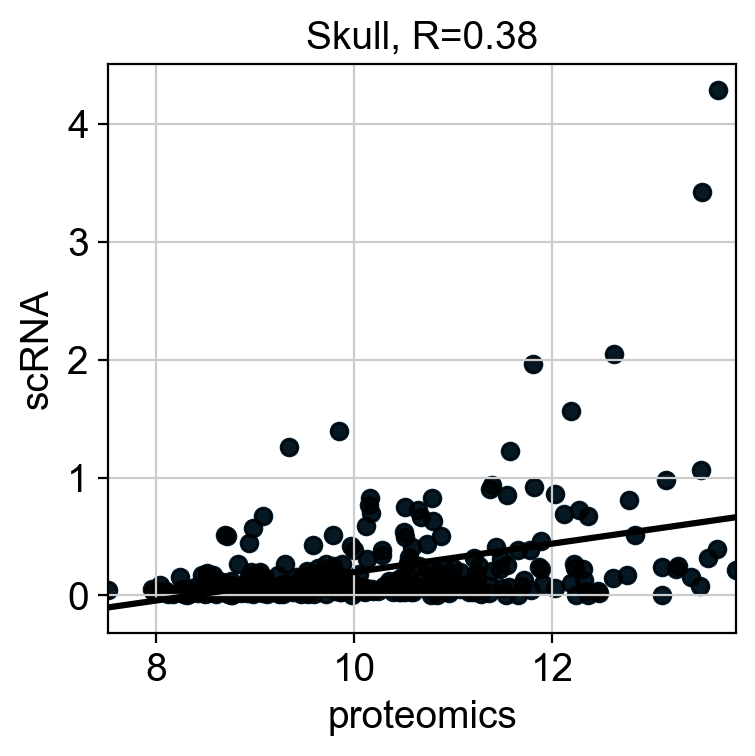

In [30]:
c="Calvaria"

data = pd.DataFrame()
data["scRNA"] = data_scrna_nd[c]
data["proteomics"] = data_prot_nd[c]

plt.scatter(data_prot_nd[c], data_scrna_nd[c])
r = spearmanr(data_prot_nd[c], data_scrna_nd[c].fillna(0))[0]

sns.regplot(
                x="proteomics",
                y="scRNA",
                data=data,
                ci=None,
                color="black"
    )
plt.title(f"Skull, R={r.round(2)}")
plt.tight_layout()
plt.show()

##### Neutrophil_mediated_immunity_genes

In [ ]:
data_scrna_mrna = pd.read_csv(f"{DATA_DIR}/{FILE_NAME_MRNA_SCRNA}", index_col=0)

In [25]:
adata_prot_mrna = adata_prot[adata_prot.obs["region"] == "Calvaria", mrna_processing_genes]


data_prot_mrna = pd.DataFrame(index=adata_prot_mrna.var_names)
data_prot_mrna["Calvaria"] = adata_prot_mrna.X.mean(axis=0)

adata_prot_mrna

View of AnnData object with n_obs × n_vars = 20 × 182
    obs: 'sample', 'region', 'region_sample', 'age', 'cause_of_death', 'pmi', 'sex'
    var: 'gene', 'protein_id', 'protein_names', 'n_cells'
    uns: 'neighbors', 'pca', 'region_colors', 'sample_colors', 'sex_colors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

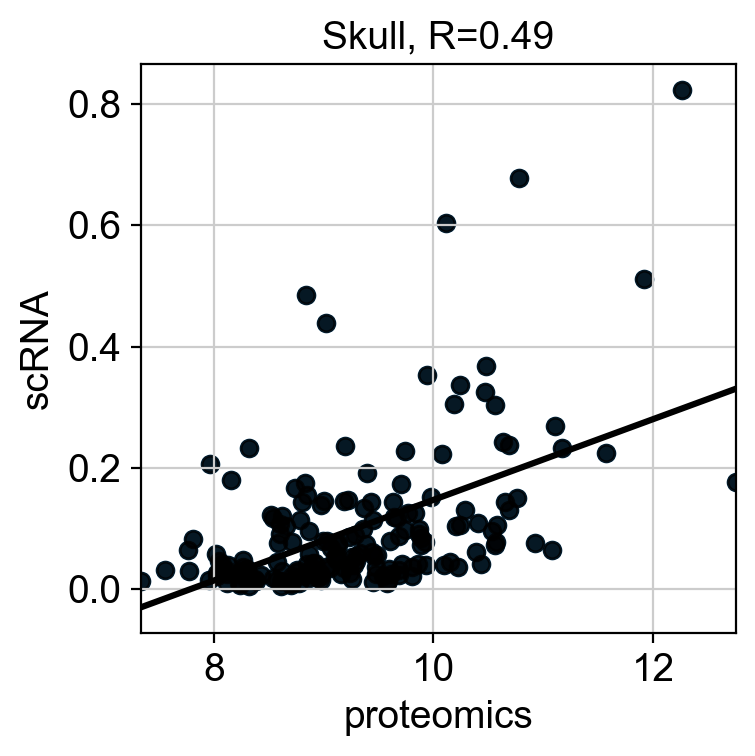

In [29]:
c="Calvaria"

data = pd.DataFrame()
data["scRNA"] = data_scrna_mrna[c]
data["proteomics"] = data_prot_mrna[c]

plt.scatter(data_prot_mrna[c], data_scrna_mrna[c])
r = spearmanr(data_prot_mrna[c], data_scrna_mrna[c].fillna(0))[0]

sns.regplot(
                x="proteomics",
                y="scRNA",
                data=data,
                ci=None,
                color="black"
    )
plt.title(f"Skull, R={r.round(2)}")
plt.tight_layout()
plt.show()